## Pacotes 

In [8]:
from LightPipes import *
from matplotlib import image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random

def Lambda(M,N,sigma,delta,mu,k):
  a = 1/(4*sigma**2) # [L]^-2
  b = 1/(2*delta**2) # [L]^-2
  c = 2*np.sqrt( a**2 + 2*a*b + (k*mu)**2/4)
  L = (np.pi/(a + b + c/2))*(( b + (k*mu)/2 )/(  b - (k*mu)/2 ))**(M/2)*((a + b - c/2)/( a + b + c/2 ))**(abs(M)/2 + N )
  return L

# Distribuição dos Autovalores

Números de Modos 11
[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0]]
[1.0, 0.6667178208324576, 0.444512652615581, 0.2963645070843154, 0.19759149833534018, 0.13173777318515817, 0.08783192105932923, 0.05855910700820442, 0.039042400214404756, 0.02603026399101661, 0.017354840883784185]


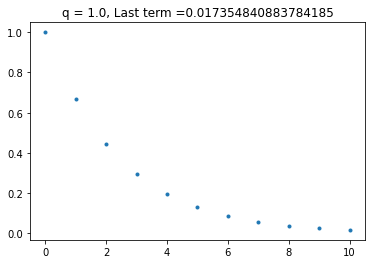

In [13]:
# Parâmetros do feixe TGSM
lambd = 780*nm        # light wavelength
sigma = .15*mm         # largura
delta = .15*mm         # comprimento de coerência
mu    = .00551737136051/mm         # fator de twist
k     = 2*np.pi/lambd

N = 10
M = 50
A = []
x_y = []
Modos = 0
for i in range(0,N):
  for j in range(-M,M):
    B = Lambda(j,i,sigma,delta,mu,k)/Lambda(0,0,sigma,delta,mu,k)
    if B > 0.015:
      A.append( B )
      x_y.append([j,i])
      Modos +=1


print("Números de Modos", Modos )
print(x_y)
print(A)
A.sort(reverse=True)
plt.title( f"q = {delta/sigma}, Last term ={A[-1]}")
plt.plot(A,".")

plt.show()

In [ ]:

sigma = .5*mm         # largura
delta = .28*mm         # comprimento de coerência

N = 5
M = 5
A = []
Modos = 0
for i in range(0,N):
  for j in range(-M,M):
    B = Lambda(j,i)/Lambda(0,0)
    if B > 0.01:
      A.append( B )
      Modos +=1

A.sort(reverse=True)
print("Números de Modos", Modos )
plt.title( f"q = {delta/sigma}, Last term ={A[-1]}")
plt.plot(A,".")
plt.show()
#####################################################################
Q = [1,0.75,0.5,0.25]
for q in Q :
  A = []
  Modos = 0
  for i in range(0,N):
    for j in range(-M,M):
      B = ( (1+q/2-np.sqrt(q**2/4 + q))/(1 +q/2+np.sqrt(q**2/4 + q))
          )**(abs(j)/2 + i)
      if B > 0.001:
        A.append( B )
        Modos +=1
  A.sort(reverse=True)
  print("Números de Modos", Modos )
  plt.title( f"q = {q},Last term ={A[-1]}")
  plt.plot(A,".")
  plt.show()

#Campo 

In [ ]:
sigma = .5*mm        # largura
delta = .1*mm        # comprimento de coerência

Numero_de_Soma_Inc = 0
L = 50
P = 50
for j in range(-L,L+1):
  for jj in range(P+1):
    cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
    if (cutoff >= 0.5):
      Numero_de_Soma_Inc +=1
print(Numero_de_Soma_Inc)

10


In [ ]:
#Parâmetros do feixe GSM
lambd = 780*nm        # light wavelength
n     = 2**9          # Dimensão 
dx    = 10*um         # Tamanho do pixel
x = np.arange(-n/2, n/2,1)*dx
xx,yy = np.meshgrid(x,x) 

#Gerando os campos para a soma incoerente

a = 1/(4*sigma**2) # [L]^-2
b = 1/(2*delta**2) # [L]^-2
c = 2*np.sqrt( a**2 + 2*a*b ) 
w = np.sqrt( 2/c )

S =  np.exp( 1j*np.zeros((n,n,Numero_de_Soma_Inc))) # Campo 
aux3 = np.zeros( (n,n,Numero_de_Soma_Inc) )           # Intensidade 

i = 0
for j in range(-L,L+1):
  for jj in range(P+1):
    cutoff  = Lambda(j,jj,sigma,delta)/Lambda(0,0,sigma,delta)
    if (cutoff >= 0.5):
      r    = np.sqrt(xx**2+yy**2)                                                 
      C    = np.sqrt(2*np.math.factorial(jj)/(np.pi*np.math.factorial(jj+abs(j))))
      PL   = scipy.special.assoc_laguerre(2*r**2/w**2,jj,abs(j))
      Fase = np.exp(- 1j*j*np.arctan2(yy,xx) )

      LG   = C*1/w*(r*np.sqrt(2)/w)**abs(j)*PL*np.exp(-r**2/w**2)*Fase

      S[:,:,i] = np.sqrt(Lambda(j,jj,sigma,delta))*LG
      aux3[:,:,i] = abs( np.sqrt(Lambda(j,jj,sigma,delta))*LG )**2
      i += 1

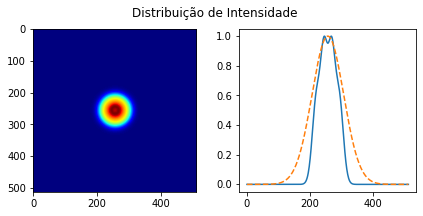

In [ ]:
B = np.exp(-xx[256]**2/(2*sigma**2) )
# campo total --> soma incoerente
A = np.sum( aux3 ,2)
A = A/A.max()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))
fig.suptitle('Distribuição de Intensidade')

ax1.imshow(A,cmap="jet")
ax2.plot(A[:,256])
ax2.plot(B,"--")
plt.show()

In [ ]:
xx[256]^2/(4*sigma**2)

# Doc(r,0)

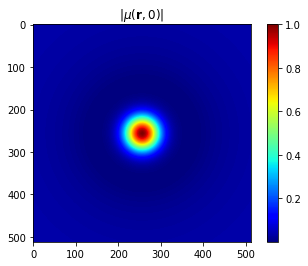

In [ ]:
ref = [0,0]                        
index = np.where((xx==ref[0])*(yy==ref[1])==True)        

mu = np.zeros_like(S[:,:,1])
intMap = np.sum(abs(S)**2,2) 

for ii in range(0,n):
    for jj in range(0,n):
      mu[ii,jj] = np.sum(np.conj(S[ii,jj,:])*S[index[0],index[1],:])/np.sqrt(intMap[ii,jj]*intMap[index[0],index[1]])

img = abs(mu) 
img = img/img.max()

plt.imshow(img,cmap = "jet");
plt.title('|$\mu(\mathbf{r},0)$|');
plt.colorbar();
plt.show()

# Interferencia 

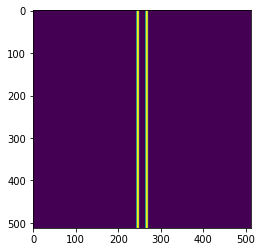

In [ ]:
# Inicialização

class grid:
  pass
grid.N  = n;   
grid.dx = dx                               
grid.x  = np.arange(-grid.N/2,grid.N/2,1)*grid.dx;
[grid.xx,grid.yy] = np.meshgrid(grid.x,grid.x);  

d0 = .2*mm; 
a0 = .06*mm; 
# make slit
fslit = (np.ones_like(grid.xx)*(abs(grid.xx+(d0/2))<=a0/2) +
         np.ones_like(grid.xx)*(abs(grid.xx-(d0/2))<=a0/2));
F  = Begin(abs(x[0])*2,lambd,n-1)  
plt.imshow(fslit);plt.show()

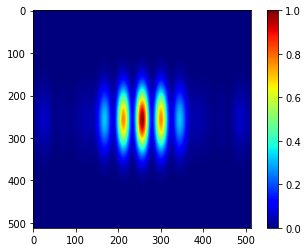

In [ ]:
# passando pelas fendas --> soma incoerente
imagem =[0]
aux4 = np.exp(1j*np.zeros((n,n,i)))
FF = F.copy(F)

for ii in range(i):
  FF.field = S[:,:,ii]*fslit
  FF1      = Forvard(15*cm,FF)
  aux4[:,:,ii] = Intensity(FF1)
  imagem     += Intensity(FF1)
imagem = imagem/imagem.max()
plt.imshow(imagem,cmap = "jet");plt.colorbar();plt.show()

In [ ]:
# Ajustado para analisar na Direita e esquerda
### Função da Suavização #########################
def SUAVE(media, linha):
  novalista = []
  for i in range(media ,2**9,1):
    b = imagem[linha,i-media:i]
    AA = sum(b)/media
    novalista.append(AA)
  return np.array(novalista)

def MM(suavizar,linha):
  maxi2 = SUAVE(suavizar,linha).max()
  posiçao2 = 0
  for i in SUAVE(suavizar,linha):
    if i == maxi2:
      break 
    posiçao2 +=1 

#### Encontrar o valor mínimo local a Direita parti do maximo global
  mini = 0
  Vimax = SUAVE(suavizar,linha)[posiçao2:2**9]
  for i in range(len(Vimax)):
    if i == len(Vimax)-1:
      break
    if Vimax[i] > Vimax[i+1]:
      mini = Vimax[i+1]
    elif Vimax[i] < Vimax[i+1]:
      mini = Vimax[i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMin = 0 
  for i in Vimax:
    if i == mini:
      break 
    PMin += 1  
  posiçaomin = posiçao2 + PMin -1
#######################################################################
#### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
  miniE = 0
  xamiV = SUAVE(suavizar,linha)[0:posiçao2]
#########################################################
  for i in range(len(xamiV)):
    i += 1
    if i == len(xamiV)-1:
      break
    if xamiV[-i] > xamiV[-i-1]:
      miniE = xamiV[-i-1]
    elif xamiV[-i] < xamiV[-i-1]:
      miniE = xamiV[-i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMinE = 0 
  for i in range(len(xamiV)):
    i+=1
    if xamiV[-i] == miniE: 
      break 
    PMinE += 1  
  posiçaominE = posiçao2 - PMinE

  if miniE > mini:
    posiçaomin = posiçaominE
    mini       = miniE
  # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
  return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE  

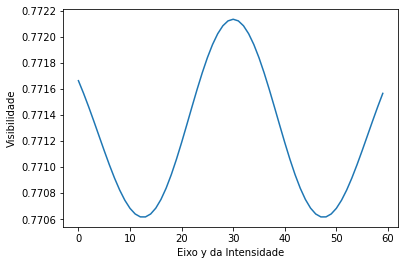

Valor medio da grau de coerencia/Visibilidade  0.7712313856423896


In [ ]:
# A VISIBILIDADE TODA
VisibilidadeN = []
q = 2
qq = 0
for j in range(grid.N//2 -30,grid.N//2 +30):
  V = ( MM(q,j)[0]-MM(q,j)[2])/(MM(q,j)[0]+MM(q,j)[2])
  VisibilidadeN.append(V) 
  qq+=1
  
plt.plot(VisibilidadeN) 
plt.xlabel('Eixo y da Intensidade')
plt.ylabel("Visibilidade")
plt.show()
print("Valor medio da grau de coerencia/Visibilidade ",sum(VisibilidadeN)/qq)